In [1]:
from helius import NFTAPI, NameAPI, BalancesAPI, WebhooksAPI, TransactionsAPI
from dotenv import load_dotenv
from pathlib import Path
import requests
import pandas as pd
import numpy as np
import os
import time
import json
import joblib


In [2]:
pd.set_option('display.max_colwidth', None)  
pd.set_option('display.max_columns', None)   
pd.set_option('display.width', 200)    
pd.set_option('display.float_format', '{:.8f}'.format)

In [3]:
df_validators = joblib.load('df_validators.joblib')

df_expanded = joblib.load('df_expanded.joblib')

df_cleaned = joblib.load('df_cleaned.joblib')

df_tps = joblib.load('df_tps.joblib')

df_supply = joblib.load('df_supply.joblib')

df_fees = joblib.load('df_fees.joblib')

df_inflation = joblib.load('df_inflation.joblib')

In [4]:


df_validators #.head()

,network,account,name,keybase_id,www_url,details,avatar_url,created_at,updated_at,admin_warning,jito,jito_commission,stake_pools_list,is_active,avatar_file_url,active_stake,authorized_withdrawer_score,commission,data_center_concentration_score,delinquent,published_information_score,root_distance_score,security_report_score,skipped_slot_score,skipped_after_score,software_version,software_version_score,stake_concentration_score,consensus_mods_score,vote_latency_score,total_score,vote_distance_score,ip,data_center_key,autonomous_system_number,latitude,longitude,data_center_host,vote_account,epoch_credits,epoch,url,skipped_slots,skipped_slot_percent,ping_time
0,mainnet,4VrjyXQT61WFSjuG3ehgqZUK1jqvYqB46veQbXLotq3n,Vault X | 0% fee +MEV,rxtx,https://stake.solfi.uk,"Safety, reliability, speed",https://s3.amazonaws.com/keybase_processed_uploads/c00270ec4b198ab0aa96b654ea7cd605_360_360.jpg,2022-04-24 23:00:09 UTC,2025-02-13 03:40:05 UTC,None,True,0.00000000,"[BlazeStake, Jpool]",True,https://prod-validators.nyc3.digitaloceanspaces.com/xclfhh3xmp20ku2py7j4ndjhmiiz,129778594625380,0,0,0,False,2,2,1,2,0,2.1.21,2,0,0,2.00000000,13,2,50.7.5.42,30058-IE-Dublin,30058.00000000,53.3382,-6.2591,None,FahWJg2PkphJaMUUCzdYhXkD5NngUuuFRFD3YCE3BSwb,149144.00000000,787.00000000,https://www.validators.app/api/v1/validators/mainnet/4VrjyXQT61WFSjuG3ehgqZUK1jqvYqB46veQbXLotq3n,NaN,NaN,NaN
1,mainnet,DP9iBgK9c7tJYb83KhxQMFNc1LXYu7nE7EhWpEzQnjmg,Sec3,,https://www.sec3.dev/solana-validators,Sec3 is a security and research firm providing bespoke audits and cutting edge security software to Web3 projects.,https://pro.sec3.dev/sec3_logo_solid.png,2024-04-23 12:53:25 UTC,2025-04-24 03:40:06 UTC,None,True,800.00000000,[Aero],True,https://prod-validators.nyc3.digitaloceanspaces.com/zia1i71u0ozomm4evnrxgmnoqxc2,52927037220737,0,5,0,False,2,2,1,2,0,2.1.21,2,0,0,2.00000000,13,2,185.191.117.17,213896-DE-Frankfurt am Main,213896.00000000,50.1169,8.6837,None,EnRcbgr5r7EUS2P35szncy6TW6eWA9UQiU3yQRCDbh2P,149146.00000000,787.00000000,https://www.validators.app/api/v1/validators/mainnet/DP9iBgK9c7tJYb83KhxQMFNc1LXYu7nE7EhWpEzQnjmg,0.00000000,0.0,NaN
2,mainnet,7y5VhV4fkz6r4zUmH2UiwPjLwXzPL1PcV28or5NWkWRL,Haus – Guaranteed Best APY & No Fees,,https://www.staking.haus/,"Haus is a Solana-focused validator with 0% fees. We guarantee the highest returns by matching the highest APY validator on the network (even if it’s not us), and we give large stakers an extra 10% native APY boost. Contact us at info@staking.haus.",https://www.staking.haus/hauslogo.png,2021-09-30 04:24:13 UTC,2025-05-09 03:40:05 UTC,None,True,0.00000000,"[BlazeStake, Jito, Marinade]",True,https://prod-validators.nyc3.digitaloceanspaces.com/s4pd0t8eyorvzfrm5js38weqn1me,2024522225108597,0,0,0,False,2,2,1,2,0,2.1.21,2,0,0,2.00000000,13,2,149.255.37.142,29802-NL-Amsterdam,29802.00000000,52.3891,4.6563,None,HxRrsnbc6K8CdEo3LCTrSUkFaDDxv9BdJsTDzBKnUVWH,149311.00000000,787.00000000,https://www.validators.app/api/v1/validators/mainnet/7y5VhV4fkz6r4zUmH2UiwPjLwXzPL1PcV28or5NWkWRL,0.00000000,0.0,NaN
3,mainnet,AAHSdsnRREfdQNzDGRxai8CLXh9EPCoRdwULPqBYd9fb,StakeArmy,stakearmy,https://stakearmy.com,High Uptime,https://s3.amazonaws.com/keybase_processed_uploads/f0dba3e5b88045f95b11db2ebc38ab05_360_360.jpg,2022-03-22 14:19:12 UTC,2024-11-27 03:40:05 UTC,None,True,1000.00000000,[BlazeStake],True,https://prod-validators.nyc3.digitaloceanspaces.com/3gufbxp1khfyadpw66cogyp5rlpm,24680203689888,0,0,0,False,2,2,1,2,2,2.1.21,2,0,0,2.00000000,13,2,80.76.51.122,48014-AL-Tirana,48014.00000000,41.3253,19.8184,None,91ciyr81FJnZaoWcDT4PHwwdzgNp21cgH354JbCuxnwR,149306.00000000,787.00000000,https://www.validators.app/api/v1/validators/mainnet/AAHSdsnRREfdQNzDGRxai8CLXh9EPCoRdwULPqBYd9fb,0.00000000,0.0,NaN
4,mainnet,xLabscif2DLnYg39rQThqi7A9E45L9qiysRZhmZ1ARE,xLabs,,https://xlabs.xyz,Core infrastructure and open-source contributions for the internet of value.,https://xlabs.xyz/xlabs-icon.png,2024-10-30 15:08:04 UTC,2025-05-09 03:40:05 UTC,None

In [5]:
df_validators.columns.to_list()


['network',
 'account',
 'name',
 'keybase_id',
 'www_url',
 'details',
 'avatar_url',
 'created_at',
 'updated_at',
 'admin_warning',
 'jito',
 'jito_commission',
 'stake_pools_list',
 'is_active',
 'avatar_file_url',
 'active_stake',
 'authorized_withdrawer_score',
 'commission',
 'data_center_concentration_score',
 'delinquent',
 'published_information_score',
 'root_distance_score',
 'security_report_score',
 'skipped_slot_score',
 'skipped_after_score',
 'software_version',
 'software_version_score',
 'stake_concentration_score',
 'consensus_mods_score',
 'vote_latency_score',
 'total_score',
 'vote_distance_score',
 'ip',
 'data_center_key',
 'autonomous_system_number',
 'latitude',
 'longitude',
 'data_center_host',
 'vote_account',
 'epoch_credits',
 'epoch',
 'url',
 'skipped_slots',
 'skipped_slot_percent',
 'ping_time']

In [6]:


df_expanded.head()

,timestamp,nodePubkey,commission,activatedStake,lastVote,rootSlot,epochVoteAccount,epoch,credits,previous_credits,credits_earned,votePubkey
4813,2025-05-14 16:11:29.984106+00:00,138KHwTqKNWGLoo8fK5i8UxYtwoC5tC8o7M9rY1CDEjT,0,29324645372960,339993667,339993636,True,783,670375331,663485837,6889494,ASfKFAKz6fH4eip1jdLGt5Ym954kU9KYnwq2Csn9ogSz
4814,2025-05-14 16:11:29.984106+00:00,138KHwTqKNWGLoo8fK5i8UxYtwoC5tC8o7M9rY1CDEjT,0,29324645372960,339993667,339993636,True,784,677274232,670375331,6898901,ASfKFAKz6fH4eip1jdLGt5Ym954kU9KYnwq2Csn9ogSz
4815,2025-05-14 16:11:29.984106+00:00,138KHwTqKNWGLoo8fK5i8UxYtwoC5tC8o7M9rY1CDEjT,0,29324645372960,339993667,339993636,True,785,684174907,677274232,6900675,ASfKFAKz6fH4eip1jdLGt5Ym954kU9KYnwq2Csn9ogSz
4816,2025-05-14 16:11:29.984106+00:00,138KHwTqKNWGLoo8fK5i8UxYtwoC5tC8o7M9rY1CDEjT,0,29324645372960,339993667,339993636,True,786,691053198,684174907,6878291,ASfKFAKz6fH4eip1jdLGt5Ym954kU9KYnwq2Csn9ogSz
4817,2025-05-14 16:11:29.984106+00:00,138KHwTqKNWGLoo8fK5i8UxYtwoC5tC8o7M9rY1CDEjT,0,29324645372960,339993667,339993636,True,787,691207384,691053198,154186,ASfKFAKz6fH4eip1jdLGt5Ym954kU9KYnwq2Csn9ogSz


In [7]:
df_expanded['vote_account'] = df_expanded['votePubkey']

In [8]:
# df_expanded.columns.to_list()

In [9]:
df_merge = df_validators.merge(df_expanded, how = 'left', on = ['vote_account', 'epoch'] )

In [10]:
df_merge["active_stake_SOL"] = df_merge["active_stake"] / 1e9

In [11]:
df_merge.head()

,network,account,name,keybase_id,www_url,details,avatar_url,created_at,updated_at,admin_warning,jito,jito_commission,stake_pools_list,is_active,avatar_file_url,active_stake,authorized_withdrawer_score,commission_x,data_center_concentration_score,delinquent,published_information_score,root_distance_score,security_report_score,skipped_slot_score,skipped_after_score,software_version,software_version_score,stake_concentration_score,consensus_mods_score,vote_latency_score,total_score,vote_distance_score,ip,data_center_key,autonomous_system_number,latitude,longitude,data_center_host,vote_account,epoch_credits,epoch,url,skipped_slots,skipped_slot_percent,ping_time,timestamp,nodePubkey,commission_y,activatedStake,lastVote,rootSlot,epochVoteAccount,credits,previous_credits,credits_earned,votePubkey,active_stake_SOL
0,mainnet,4VrjyXQT61WFSjuG3ehgqZUK1jqvYqB46veQbXLotq3n,Vault X | 0% fee +MEV,rxtx,https://stake.solfi.uk,"Safety, reliability, speed",https://s3.amazonaws.com/keybase_processed_uploads/c00270ec4b198ab0aa96b654ea7cd605_360_360.jpg,2022-04-24 23:00:09 UTC,2025-02-13 03:40:05 UTC,None,True,0.00000000,"[BlazeStake, Jpool]",True,https://prod-validators.nyc3.digitaloceanspaces.com/xclfhh3xmp20ku2py7j4ndjhmiiz,129778594625380,0,0,0,False,2,2,1,2,0,2.1.21,2,0,0,2.00000000,13,2,50.7.5.42,30058-IE-Dublin,30058.00000000,53.3382,-6.2591,None,FahWJg2PkphJaMUUCzdYhXkD5NngUuuFRFD3YCE3BSwb,149144.00000000,787.00000000,https://www.validators.app/api/v1/validators/mainnet/4VrjyXQT61WFSjuG3ehgqZUK1jqvYqB46veQbXLotq3n,NaN,NaN,NaN,2025-05-14 16:11:29.984106+00:00,4VrjyXQT61WFSjuG3ehgqZUK1jqvYqB46veQbXLotq3n,0.00000000,129778594625380.00000000,339993667.00000000,339993636.00000000,True,729760280.00000000,729606256.00000000,154024.00000000,FahWJg2PkphJaMUUCzdYhXkD5NngUuuFRFD3YCE3BSwb,129778.59462538
1,mainnet,DP9iBgK9c7tJYb83KhxQMFNc1LXYu7nE7EhWpEzQnjmg,Sec3,,https://www.sec3.dev/solana-validators,Sec3 is a security and research firm providing bespoke audits and cutting edge security software to Web3 projects.,https://pro.sec3.dev/sec3_logo_solid.png,2024-04-23 12:53:25 UTC,2025-04-24 03:40:06 UTC,None,True,800.00000000,[Aero],True,https://prod-validators.nyc3.digitaloceanspaces.com/zia1i71u0ozomm4evnrxgmnoqxc2,52927037220737,0,5,0,False,2,2,1,2,0,2.1.21,2,0,0,2.00000000,13,2,185.191.117.17,213896-DE-Frankfurt am Main,213896.00000000,50.1169,8.6837,None,EnRcbgr5r7EUS2P35szncy6TW6eWA9UQiU3yQRCDbh2P,149146.00000000,787.00000000,https://www.validators.app/api/v1/validators/mainnet/DP9iBgK9c7tJYb83KhxQMFNc1LXYu7nE7EhWpEzQnjmg,0.00000000,0.0,NaN,2025-05-14 16:11:29.984106+00:00,DP9iBgK9c7tJYb83KhxQMFNc1LXYu7nE7EhWpEzQnjmg,5.00000000,52927037220737.00000000,339993667.00000000,339993636.00000000,True,613989695.00000000,613835669.00000000,154026.00000000,EnRcbgr5r7EUS2P35szncy6TW6eWA9UQiU3yQRCDbh2P,52927.03722074
2,mainnet,7y5VhV4fkz6r4zUmH2UiwPjLwXzPL1PcV28or5NWkWRL,Haus – Guaranteed Best APY & No Fees,,https://www.staking.haus/,"Haus is a Solana-focused validator with 0% fees. We guarantee the highest returns by matching the highest APY validator on the network (even if it’s not us), and we give large stakers an extra 10% native APY boost. Contact us at info@staking.haus.",https://www.staking.haus/hauslogo.png,2021-09-30 04:24:13 UTC,2025-05-09 03:40:05 UTC,None,True,0.00000000,"[BlazeStake, Jito, Marinade]",True,https://prod-validators.nyc3.digitaloceanspaces.com/s4pd0t8eyorvzfrm5js38weqn1me,2024522225108597,0,0,0,False,2,2,1,2,0,2.1.21,2,0,0,2.00000000,13,2,149.255.37.142,29802-NL-Amsterdam,29802.00000000,52.3891,4.6563,None,HxRrsnbc6K8CdEo3LCTrSUkFaDDxv9BdJsTDzBKnUVWH,149311.00000000,787.00000000,https://www.validators.app/api/v1/validators/mainnet/7y5VhV4fkz6r4zUmH2UiwPjLwXzPL1PcV28or5NWkWRL,0.00000000,0.0,NaN,2025-05-14 16:11:29.984106+00:00,7y5VhV4fkz6r4zUmH2UiwPjLwXzPL1PcV28or5NWkWRL,0.00000000,2024522225108597.00000000,339993667.00000000,339993636.00000000,True,763710680.00000000,763556489.00000000,154191.00000000,HxRrsnbc6K8CdEo3LCTrSUkFaDDxv9B

In [12]:
# ['avatar_url','name', active_stake', 'activatedStake', 'lastVote', 'rootSlot', 'delinquent', 'commission', 'epoch_credits', 'skipped_slot_percent', 'jito_commission', 'jito','details','data_center_key','latitude',	'longitude' ]

In [13]:
current_validator_performance = df_merge[
    ['avatar_url', 'name', 'active_stake_SOL', 'delinquent', 'commission_y', 
     'epoch_credits', 'skipped_slot_percent', 'jito_commission', 'jito', 
     'details']
    ]

current_validator_performance.head()

,avatar_url,name,active_stake_SOL,delinquent,commission_y,epoch_credits,skipped_slot_percent,jito_commission,jito,details
0,https://s3.amazonaws.com/keybase_processed_uploads/c00270ec4b198ab0aa96b654ea7cd605_360_360.jpg,Vault X | 0% fee +MEV,129778.59462538,False,0.00000000,149144.00000000,NaN,0.00000000,True,"Safety, reliability, speed"
1,https://pro.sec3.dev/sec3_logo_solid.png,Sec3,52927.03722074,False,5.00000000,149146.00000000,0.0,800.00000000,True,Sec3 is a security and research firm providing bespoke audits and cutting edge security software to Web3 projects.
2,https://www.staking.haus/hauslogo.png,Haus – Guaranteed Best APY & No Fees,2024522.22510860,False,0.00000000,149311.00000000,0.0,0.00000000,True,"Haus is a Solana-focused validator with 0% fees. We guarantee the highest returns by matching the highest APY validator on the network (even if it’s not us), and we give large stakers an extra 10% native APY boost. Contact us at info@staking.haus."
3,https://s3.amazonaws.com/keybase_processed_uploads/f0dba3e5b88045f95b11db2ebc38ab05_360_360.jpg,StakeArmy,24680.20368989,False,0.00000000,149306.00000000,0.0,1000.00000000,True,High Uptime
4,https://xlabs.xyz/xlabs-icon.png,xLabs,95365.03370650,False,5.00000000,149145.00000000,NaN,1000.00000000,True,Core infrastructure and open-source contributions for the internet of value.


In [14]:
latest_epoch = df_cleaned['epoch'].max()

df_cleaned = df_cleaned.dropna()
# Filter out the rows with the latest epoch where total_rewards and total_active_stake are NaN
df_cleaned = df_cleaned[~((df_cleaned['epoch'] == latest_epoch) & df_cleaned['total_rewards'].isna() & df_cleaned['total_active_stake'].isna())].reset_index(drop=True)



df_cleaned.head(n=5)

,epoch,starting_slot,slots_in_epoch,network,created_at,total_rewards,total_active_stake,timestamp,nodePubkey,commission,activatedStake,lastVote,rootSlot,epochVoteAccount,credits,previous_credits,credits_earned,votePubkey,activatedStake_SOL,activatedStake_USD,vote_account,total_reward_SOL,total_active_stake_SOL,name,keybase_id,www_url,details,avatar_url
0,786,339552000,432000,mainnet,2025-05-12T15:30:43.000Z,149109012834211.00000000,392945212855265664.00000000,2025-05-14 16:11:29.984106+00:00,FYWeJ3uyJRHPUYj84ebhPAa7ZTeq9WU8LHQaKAgDcF74,0,24641650865315,339993667,339993636,True,621085381,614207076,6878305,G5dZZ3J95jER4v7N5LBg73ybxfg9RxFBpVc3LAY57UPu,24641.65086532,4363789.95173863,G5dZZ3J95jER4v7N5LBg73ybxfg9RxFBpVc3LAY57UPu,149109.01283421,392945212.85526568,StakeRocket 🚀 0% Fee + Jito MEV 💰 Boosted APY!,,https://stakerocket.org,Trustworthy and high performance validator. Stake with us and take profit.,https://stakerocket.org/logo.png?v=1
1,786,339552000,432000,mainnet,2025-05-12T15:30:43.000Z,149109012834211.00000000,392945212855265664.00000000,2025-05-14 16:11:29.984106+00:00,FUyx2W6wDt7u363QgQRWQYuytE5uJWZLGJpuVh3RDiCa,0,22193129928221,339993667,339993636,True,779861814,772983643,6878171,AZUYzQX7nrbN1iE25YsSCSZAywZcyr1C1anMnwZtaqX9,22193.12992822,3930181.37898866,AZUYzQX7nrbN1iE25YsSCSZAywZcyr1C1anMnwZtaqX9,149109.01283421,392945212.85526568,blockconsens.us,blockconsensus,https://blockconsens.us,,https://s3.amazonaws.com/keybase_processed_uploads/1594481f0102efd41478816dd60e5a05_360_360.jpg
2,786,339552000,432000,mainnet,2025-05-12T15:30:43.000Z,149109012834211.00000000,392945212855265664.00000000,2025-05-14 16:11:29.984106+00:00,FXfNZwnDQxNR3NVHzA3Xpctzey7AUmgz5YvWTHiUActw,0,16822136726179,339993666,339993635,True,546179957,539837184,6342773,EWRHPjhZmYj4oqgo4MyjuqoWzuPhCcRvTtdGDjuLWeMq,16822.13672618,2979032.19283904,EWRHPjhZmYj4oqgo4MyjuqoWzuPhCcRvTtdGDjuLWeMq,149109.01283421,392945212.85526568,Humbility,,https://humbility.io,,https://atlantis-email-signatures.s3.amazonaws.com/Logo(hum).png
3,786,339552000,432000,mainnet,2025-05-12T15:30:43.000Z,149109012834211.00000000,392945212855265664.00000000,2025-05-14 16:11:29.984106+00:00,FVZLnRhj9Gjf77CtDFvh7jNu8avAnduJW5m365HrDLfD,0,53614534334766,339993667,339993636,True,595772336,588908389,6863947,EijMpL5u45wg1ZTJZa4i7DvUsn8um8s5woVJsNmvCpTP,53614.53433477,9494597.88534371,EijMpL5u45wg1ZTJZa4i7DvUsn8um8s5woVJsNmvCpTP,149109.01283421,392945212.85526568,Han SOLana + Wookiee MEV,,https://hansolana.fun/,"A long time ago, in a fast blockchain…\n\nHan SOLana and Wookiee MEV sign transactions so fast fees panic!\n\nDarkness approaches... A wicked validator with old hardware and hunger for sandwiches plans to raise gas fees!\n\nCan Han SOLana save the network, or w",https://i.pinimg.com/736x/78/84/da/7884da2c7b3813094f03e09ca581e334.jpg
4,786,339552000,432000,mainnet,2025-05-12T15:30:43.000Z,149109012834211.00000000,392945212855265664.00000000,2025-05-14 16:11:29.984106+00:00,FZrSKKsKfZJovcQWRQFDXz8DbHKCSRZLZqbBAGd1dG57,0,29137638153817,339993667,339993636,True,734693927,727815637,6878290,8FPz3JG4E3HVXxGbPZVibarva4AGXSZWx3qKLUS5uFtN,29137.63815382,5159984.34065945,8FPz3JG4E3HVXxGbPZVibarva4AGXSZWx3qKLUS5uFtN,149109.01283421,392945212.85526568,Koinsortium ✨ 0% Fee +MEV,koinsortium,https://koinsortium.com/,"Koinsоrtium is a team of expert validators. High-performance secure bare metal infrastructure and extremely reliable data center, high uptime and zero commission will allow you to get the maximum rewards for your stake. +Extra Jito MEV rewards! ❤️ 0% Fee",https://s3.amazonaws.com/keybase_processed_uploads/2ea9954d86f1ac918375d2355d888705_360_360.jpg


In [15]:
df_cleaned["related_stake_percent"] = df_cleaned["activatedStake_SOL"]/df_cleaned["total_active_stake_SOL"]*100
df_cleaned["related_stake_percent"]


0      0.00627101
1      0.00564789
2      0.00428104
3      0.01364428
4      0.00741519
          ...    
3304   0.00000000
3305   0.00000284
3306   0.00002743
3307   0.00328010
3308   0.00002993
Name: related_stake_percent, Length: 3309, dtype: float64

# Top 10 Validators by Active Stake

In [16]:
df_merge

# Replace Python None and string 'None' with 'Unknown'
df_merge['name'] = df_merge['name'].replace([None, 'None'], 'Unknown')

df_merge['active_stake_SOL'] = pd.to_numeric(df_merge['active_stake_SOL'], errors='coerce')
#df_cleaned['related_stake_percent'] = pd.to_numeric(df_cleaned['related_stake_percent'], errors='coerce')

top_10_validators = df_merge[['name', 'active_stake_SOL']].sort_values(
    by='active_stake_SOL', ascending=False).head(10)

top_10_validators.reset_index(drop=True, inplace=True)

# Display the result
print(top_10_validators)


                name  active_stake_SOL
0             Helius 13868641.51609672
1    binance staking 12559429.09187048
2             Galaxy  9433957.44257118
3        Coinbase 02  8882875.77089103
4  Ledger by Figment  8760199.33150853
5            Figment  7303080.76110702
6              Kiln1  6638421.20314387
7          Everstake  5907613.13522908
8      SOL Community  5863788.62856335
9            Unknown  5548951.53294512


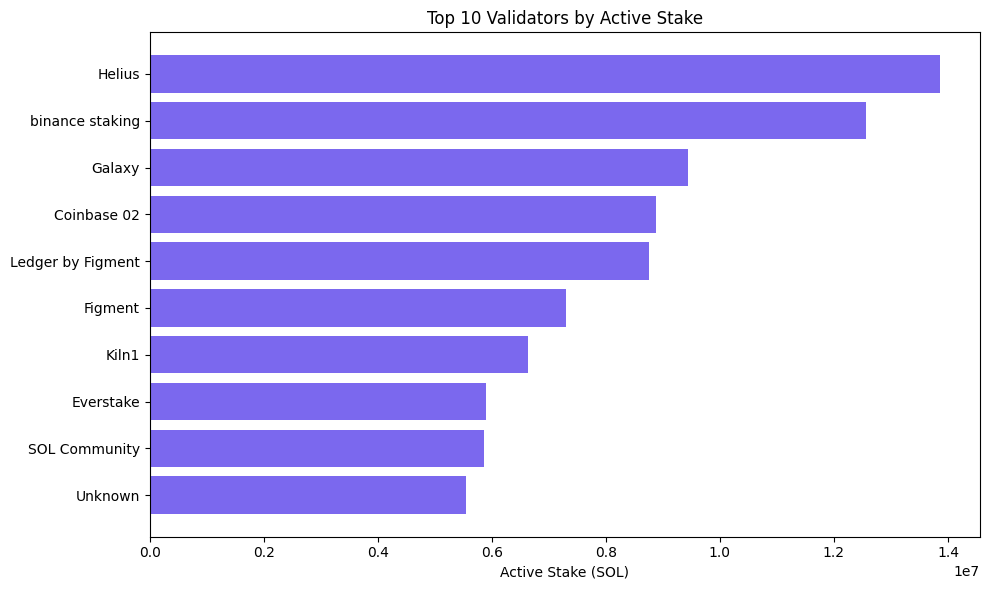

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(top_10_validators['name'], top_10_validators['active_stake_SOL'], color='mediumslateblue')
plt.xlabel('Active Stake (SOL)')
plt.title('Top 10 Validators by Active Stake')
plt.gca().invert_yaxis()  # Largest at the top
plt.tight_layout()
plt.show()


In [18]:
df_merge.columns.to_list()

['network',
 'account',
 'name',
 'keybase_id',
 'www_url',
 'details',
 'avatar_url',
 'created_at',
 'updated_at',
 'admin_warning',
 'jito',
 'jito_commission',
 'stake_pools_list',
 'is_active',
 'avatar_file_url',
 'active_stake',
 'authorized_withdrawer_score',
 'commission_x',
 'data_center_concentration_score',
 'delinquent',
 'published_information_score',
 'root_distance_score',
 'security_report_score',
 'skipped_slot_score',
 'skipped_after_score',
 'software_version',
 'software_version_score',
 'stake_concentration_score',
 'consensus_mods_score',
 'vote_latency_score',
 'total_score',
 'vote_distance_score',
 'ip',
 'data_center_key',
 'autonomous_system_number',
 'latitude',
 'longitude',
 'data_center_host',
 'vote_account',
 'epoch_credits',
 'epoch',
 'url',
 'skipped_slots',
 'skipped_slot_percent',
 'ping_time',
 'timestamp',
 'nodePubkey',
 'commission_y',
 'activatedStake',
 'lastVote',
 'rootSlot',
 'epochVoteAccount',
 'credits',
 'previous_credits',
 'credits_

/var/folders/9f/dspzp56j3pjcftph22hs9gw40000gn/T/ipykernel_61932/2309503528.py:19: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/olaoluwatunmise/miniconda3/envs/solana-predict/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


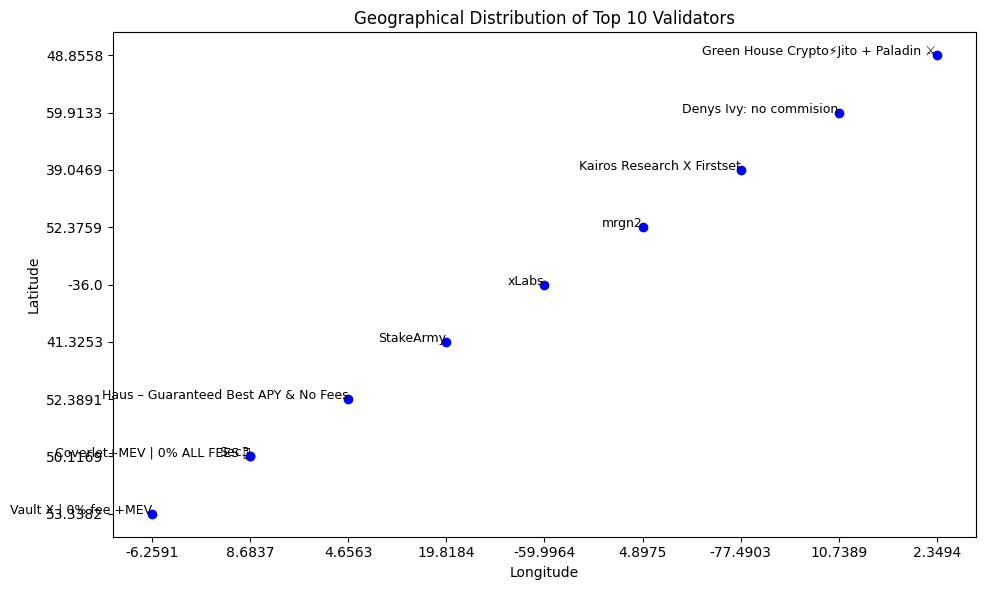

In [19]:
import matplotlib.pyplot as plt

# Select the relevant columns for geographical visualization
top_10_validators_geo = df_merge[['name', 'latitude', 'longitude']].iloc[top_10_validators.index]

# Plotting the geographical distribution (scatter plot)
plt.figure(figsize=(10, 6))
plt.scatter(top_10_validators_geo['longitude'], top_10_validators_geo['latitude'], color='blue', marker='o')

# Adding labels and title
for i, row in top_10_validators_geo.iterrows():
    plt.text(row['longitude'], row['latitude'], row['name'], fontsize=9, ha='right')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Top 10 Validators')

# Display the plot
plt.tight_layout()
plt.show()


In [20]:
previous_validator_performanced = df_cleaned[
    ['avatar_url', 'name', 'activatedStake_SOL', 'commission', 
     'credits_earned', 'details']
    ]

previous_validator_performanced.head(n=5)

,avatar_url,name,activatedStake_SOL,commission,credits_earned,details
0,https://stakerocket.org/logo.png?v=1,StakeRocket 🚀 0% Fee + Jito MEV 💰 Boosted APY!,24641.65086532,0,6878305,Trustworthy and high performance validator. Stake with us and take profit.
1,https://s3.amazonaws.com/keybase_processed_uploads/1594481f0102efd41478816dd60e5a05_360_360.jpg,blockconsens.us,22193.12992822,0,6878171,
2,https://atlantis-email-signatures.s3.amazonaws.com/Logo(hum).png,Humbility,16822.13672618,0,6342773,
3,https://i.pinimg.com/736x/78/84/da/7884da2c7b3813094f03e09ca581e334.jpg,Han SOLana + Wookiee MEV,53614.53433477,0,6863947,"A long time ago, in a fast blockchain…\n\nHan SOLana and Wookiee MEV sign transactions so fast fees panic!\n\nDarkness approaches... A wicked validator with old hardware and hunger for sandwiches plans to raise gas fees!\n\nCan Han SOLana save the network, or w"
4,https://s3.amazonaws.com/keybase_processed_uploads/2ea9954d86f1ac918375d2355d888705_360_360.jpg,Koinsortium ✨ 0% Fee +MEV,29137.63815382,0,6878290,"Koinsоrtium is a team of expert validators. High-performance secure bare metal infrastructure and extremely reliable data center, high uptime and zero commission will allow you to get the maximum rewards for your stake. +Extra Jito MEV rewards! ❤️ 0% Fee"


# Staking Reward per epoch

In [21]:
df_epochs = joblib.load('df_epochs.joblib')

In [22]:
df_epochs = df_epochs.copy()

df_epochs['total_reward_SOL'] = df_epochs['total_rewards'] / 1e9
df_epochs['total_active_stake_SOL'] = df_epochs['total_active_stake'] / 1e9

# Convert to object type to allow string + float
df_epochs['total_reward_SOL'] = df_epochs['total_reward_SOL'].astype('object')
df_epochs['total_active_stake_SOL'] = df_epochs['total_active_stake_SOL'].astype('object')


df_epochs.loc[0, ['total_reward_SOL', 'total_active_stake_SOL']] = 'ongoing'
#df_epochs

staking_rewards = df_epochs[
    [ 'epoch', 'total_reward_SOL', 'total_active_stake_SOL'

    ]
]

staking_rewards

,epoch,total_reward_SOL,total_active_stake_SOL
0,787,ongoing,ongoing
1,786,149109.01283421,392945212.85526568
2,785,149125.95670135,390905360.20912164
3,784,148872.36731620,390601341.25554407
4,783,149356.86382339,391590155.18830347
5,782,149294.26984245,392310799.00643295
6,781,149600.37601859,391208956.63559538
7,780,149328.69851630,392498296.15884197
8,779,149221.32236707,389876708.02058911
9,778,149812.28436985,389896186.28602248


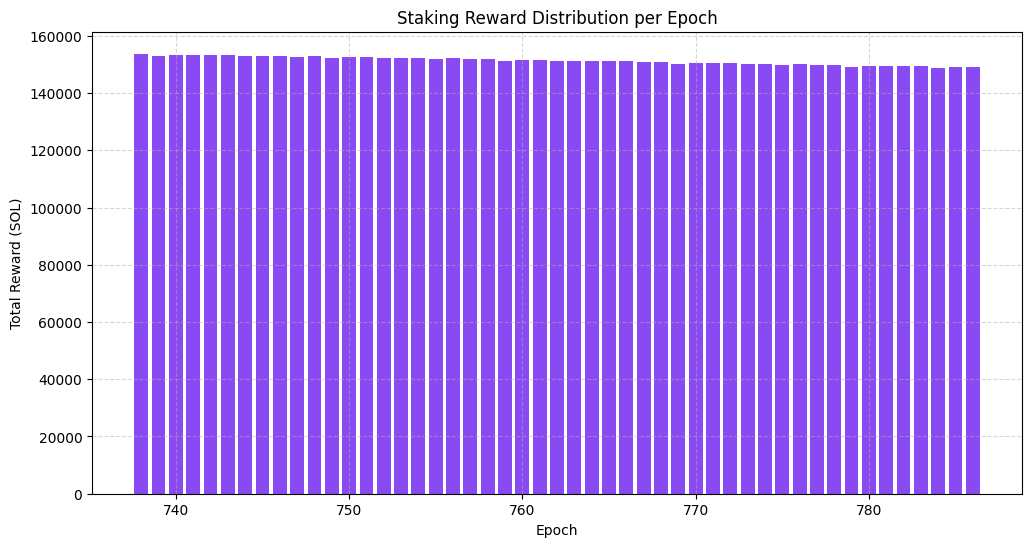

In [23]:
import matplotlib.pyplot as plt

# Filter out 'ongoing' rows and convert types
staking_rewards_filtered = staking_rewards[
    staking_rewards['total_active_stake_SOL'] != 'ongoing'
].copy()

staking_rewards_filtered['total_reward_SOL'] = staking_rewards_filtered['total_reward_SOL'].astype(float)
staking_rewards_filtered['total_active_stake_SOL'] = staking_rewards_filtered['total_active_stake_SOL'].astype(float)

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(
    staking_rewards_filtered['epoch'], 
    staking_rewards_filtered['total_reward_SOL'], 
    color="#8A4AF3"
)

ax.set_title("Staking Reward Distribution per Epoch")
ax.set_xlabel("Epoch")
ax.set_ylabel("Total Reward (SOL)")
ax.grid(True, linestyle='--', alpha=0.5)

# Display in Streamlit
#st.pyplot(fig)


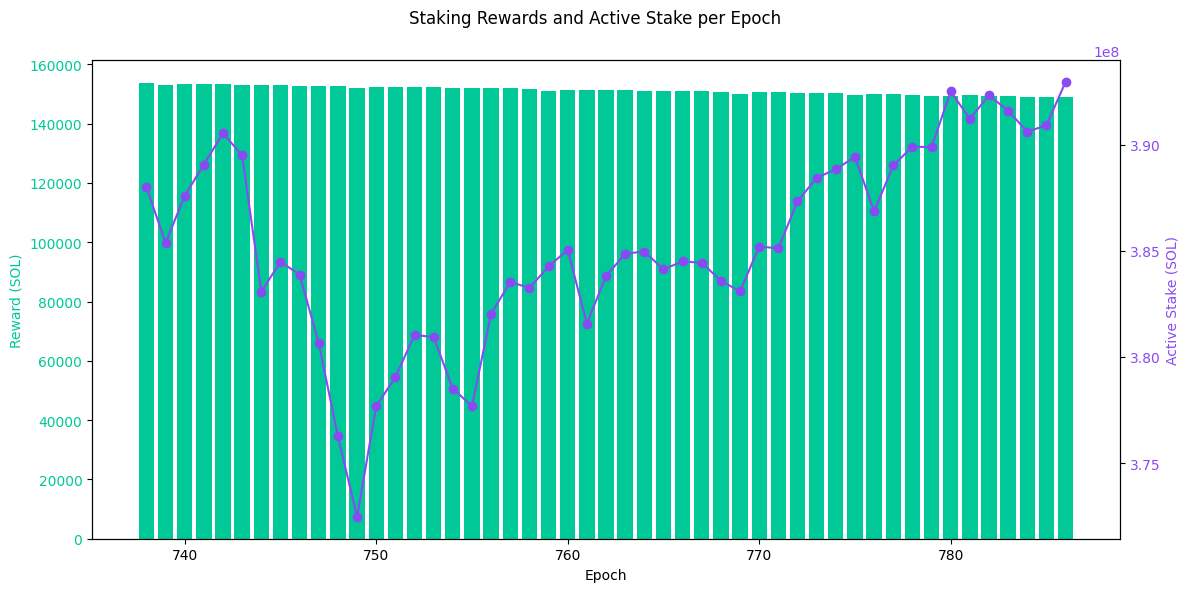

In [24]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar for rewards
ax1.bar(
    staking_rewards_filtered['epoch'], 
    staking_rewards_filtered['total_reward_SOL'], 
    color="#00C897", 
    label='Total Reward (SOL)'
)
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Reward (SOL)", color="#00C897")
ax1.tick_params(axis='y', labelcolor="#00C897")

# Line for active stake
ax2 = ax1.twinx()
ax2.plot(
    staking_rewards_filtered['epoch'], 
    staking_rewards_filtered['total_active_stake_SOL'], 
    color="#8A4AF3", 
    marker='o', 
    label='Total Active Stake (SOL)'
)
ax2.set_ylabel("Active Stake (SOL)", color="#8A4AF3")
ax2.tick_params(axis='y', labelcolor="#8A4AF3")

# Titles and layout
fig.suptitle("Staking Rewards and Active Stake per Epoch")
fig.tight_layout()

# Display in Streamlit
#st.pyplot(fig)


In [25]:
df_epochs['total_reward_SOL'] = pd.to_numeric(df_epochs['total_reward_SOL'], errors='coerce')
df_epochs['total_active_stake_SOL'] = pd.to_numeric(df_epochs['total_active_stake_SOL'], errors='coerce')
    
    # Drop epoch 786 (ongoing)
df = df_epochs[df_epochs['epoch'] != 786].copy()
    
    # Fill missing total_active_stake_SOL for epoch 773 with average of other epochs
avg_stake = df['total_active_stake_SOL'].mean()
df['total_active_stake_SOL'] = df['total_active_stake_SOL'].fillna(avg_stake)
    
    # Sort by epoch (descending)
df = df.sort_values('epoch', ascending=False)
    
df

,epoch,starting_slot,slots_in_epoch,network,created_at,total_rewards,total_active_stake,total_reward_SOL,total_active_stake_SOL
0,787,339984000,432000,mainnet,2025-05-14T15:07:05.000Z,NaN,NaN,NaN,385164018.78493220
2,785,339120000,432000,mainnet,2025-05-10T16:10:25.000Z,149125956701354.00000000,390905360209121664.00000000,149125.95670135,390905360.20912164
3,784,338688000,432000,mainnet,2025-05-08T16:51:08.000Z,148872367316200.00000000,390601341255544064.00000000,148872.36731620,390601341.25554407
4,783,338256000,432000,mainnet,2025-05-06T17:20:47.000Z,149356863823391.00000000,391590155188303488.00000000,149356.86382339,391590155.18830347
5,782,337824002,432000,mainnet,2025-05-04T18:04:09.000Z,149294269842450.00000000,392310799006432960.00000000,149294.26984245,392310799.00643295
6,781,337392000,432000,mainnet,2025-05-02T18:48:09.000Z,149600376018593.00000000,391208956635595392.00000000,149600.37601859,391208956.63559538
7,780,336960000,432000,mainnet,2025-04-30T19:23:26.000Z,149328698516297.00000000,392498296158841984.00000000,149328.69851630,392498296.15884197
8,779,336528001,432000,mainnet,2025-04-28T19:56:18.000Z,149221322367074.00000000,389876708020589120.00000000,149221.32236707,389876708.02058911
9,778,336096000,432000,mainnet,2025-04-26T20:24:27.000Z,149812284369850.00000000,389896186286022464.00000000,149812.28436985,389896186.28602248
10,777,335664000,432000,mainnet,2025-04-24T20:53:36.000Z,149912539718199.00000000,389012068850272512.00000000,149912.53971820,389012068.85027254


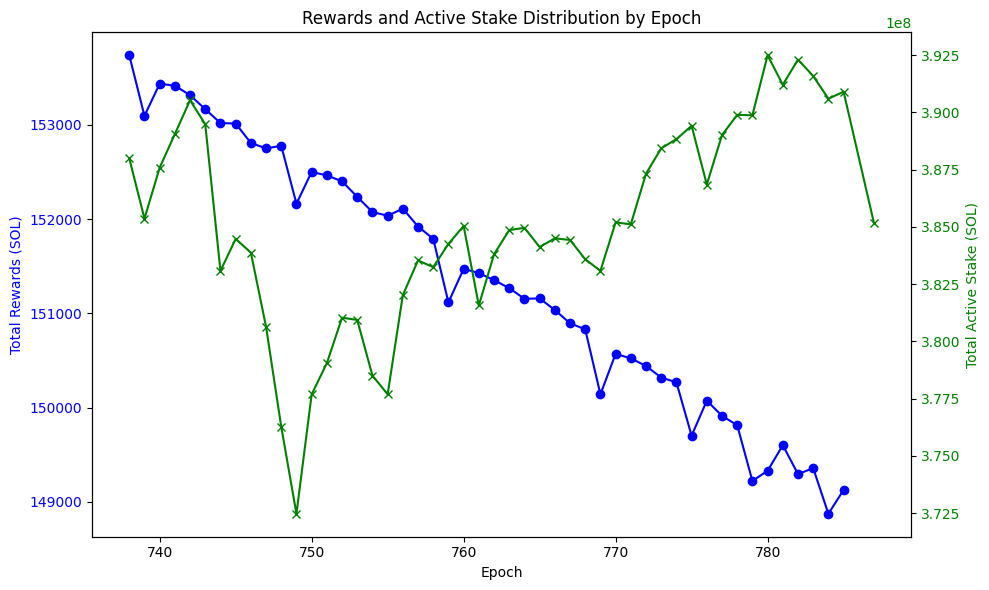

In [26]:
#Plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Primary Y-axis: Rewards
ax1.plot(df['epoch'], df['total_reward_SOL'], color='blue', marker='o', label='Total Rewards (SOL)')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Total Rewards (SOL)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Secondary Y-axis: Active Stake
ax2 = ax1.twinx()
ax2.plot(df['epoch'], df['total_active_stake_SOL'], color='green', marker='x', label='Total Active Stake (SOL)')
ax2.set_ylabel('Total Active Stake (SOL)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Title and layout
plt.title('Rewards and Active Stake Distribution by Epoch')
fig.tight_layout()
plt.show()

# Reward efficiency per epoch
### Analyzing validator economics

Reward Rate = 
Total Active Stake / Total Reward
​


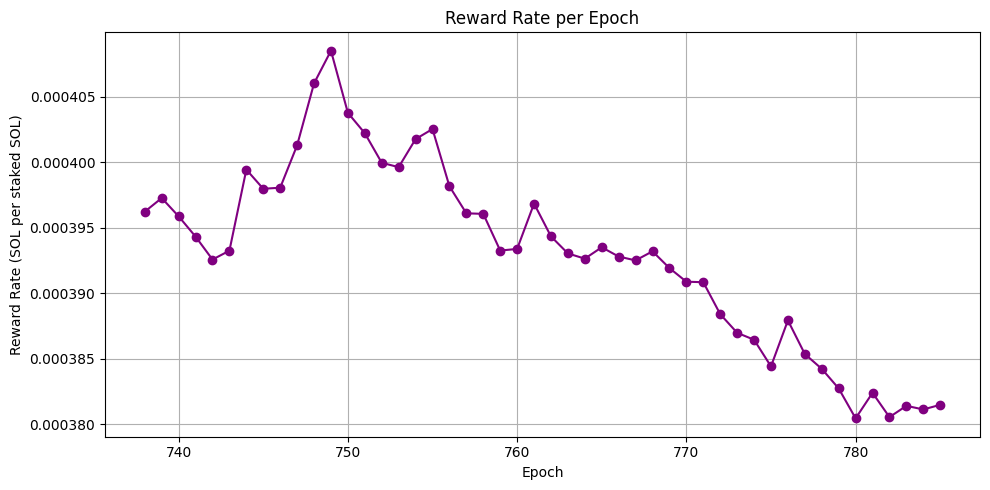

In [27]:
# Compute reward rate (rewards per unit staked)
df['reward_rate'] = df['total_reward_SOL'] / df['total_active_stake_SOL']

# Drop rows with NaN (optional, based on your data)
df = df.dropna(subset=['reward_rate'])

# Plot reward rate
plt.figure(figsize=(10, 5))
plt.plot(df['epoch'], df['reward_rate'], marker='o', color='purple')
plt.title('Reward Rate per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Reward Rate (SOL per staked SOL)')
plt.grid(True)
plt.tight_layout()
plt.show()


# Inflation Rate Breakdown

In [28]:
df_inflation

,epoch,foundation,total,validator,timestamp
0,787,0.00000000,0.04534296,0.04534296,2025-05-14 16:11:30.691305+00:00


# Network Overview

In [29]:
total_validator = df_expanded['vote_account'].unique().shape[0]
total_validator

1324

In [30]:
# Filter out 'ongoing' rows
concluded_epochs = df_epochs[df_epochs['total_active_stake_SOL'] != 'ongoing']

# Sort by epoch in descending order and get the latest one
latest_concluded = concluded_epochs.sort_values(by='epoch', ascending=False).iloc[0]


latest_active_stake_SOL = latest_concluded['total_active_stake_SOL']
latest_epoch = latest_concluded['epoch']

print(f"Latest concluded epoch: {latest_epoch}")
print(f"Total active stake (SOL): {latest_active_stake_SOL}")


Latest concluded epoch: 787
Total active stake (SOL): nan


In [31]:
tps = df_tps['tps']
tps

0   4390.91666667
Name: tps, dtype: float64

In [32]:
avg_fee_usd = df_fees['avg_fee_usd']
avg_fee_usd

0   0.00088545
Name: avg_fee_usd, dtype: float64

In [33]:
df_supply

,circulating_sol,nonCirculating_sol,total_sol
0,519564660.13983995,81234473.77101293,600799133.91085291


In [34]:
# Extract values
circulating = df_supply['circulating_sol'][0]
non_circulating = df_supply['nonCirculating_sol'][0]

